In [263]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [264]:
df = pd.read_csv('data/data.csv')

# Calculate 5 days moving average
df['sma_5'] = df.iloc[:,0].rolling(window=5).mean()
df['sma_14'] = df.iloc[:,0].rolling(window=14).mean()
df['sma_21'] = df.iloc[:,0].rolling(window=21).mean()

# Filter from lockdown 1.0 , i.e. 25 March
mask = (df['date'] >= '2020-03-25')
df = df.loc[mask]

df.head()

,dailyconfirmed,dailydeceased,dailyrecovered,date,totalconfirmed,totaldeceased,totalrecovered,sma_5,sma_14,sma_21
55,86,1,3,2020-03-25,657,11,43,80.2,41.857143,29.952381
56,73,5,7,2020-03-26,730,16,50,79.2,46.357143,33.333333
57,153,3,25,2020-03-27,883,19,75,96.0,56.571429,40.571429
58,136,5,10,2020-03-28,1019,24,85,104.4,65.500000,46.904762
59,120,3,17,2020-03-29,1139,27,102,113.6,73.357143,52.380952


In [265]:
df.tail()

,dailyconfirmed,dailydeceased,dailyrecovered,date,totalconfirmed,totaldeceased,totalrecovered,sma_5,sma_14,sma_21
95,3656,103,1082,2020-05-04,46434,1566,12845,2673.8,1992.142857,1713.333333
96,2971,128,1295,2020-05-05,49405,1694,14140,2907.8,2094.571429,1805.714286
97,3602,91,1161,2020-05-06,53007,1785,15301,3149.0,2259.571429,1935.047619
98,3344,104,1475,2020-05-07,56351,1889,16776,3305.0,2379.357143,2043.761905
99,3339,97,1111,2020-05-08,59690,1986,17887,3382.4,2517.285714,2158.857143


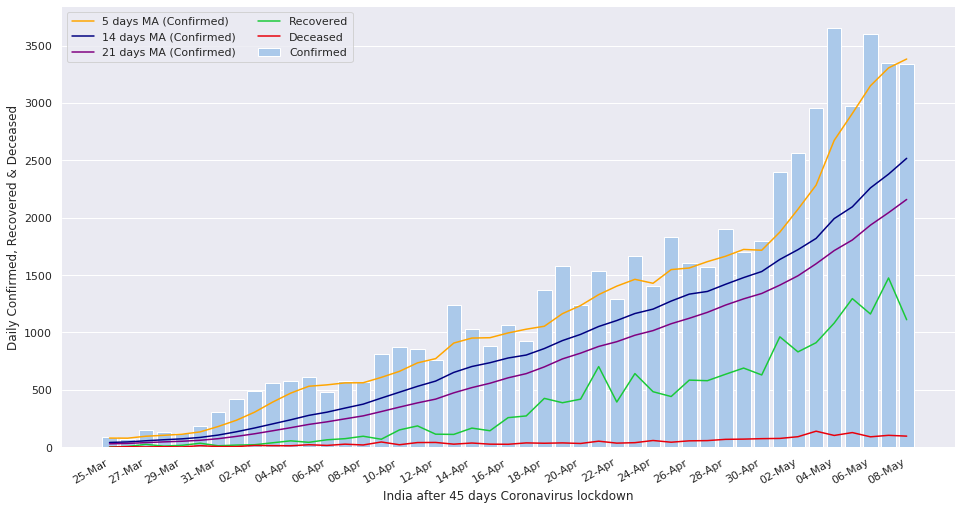

In [266]:

# Initialize the matplotlib figure
fig, axs = plt.subplots(figsize=(16, 9))

sns.set(style="darkgrid")

sns.set_color_codes("pastel")
sns.barplot(x=df.date, y=df.dailyconfirmed, color='b', label='Confirmed')

# Plot moving averages
sns.lineplot(x=df.date, y=df.sma_5, color='orange', label='5 days MA (Confirmed)')
sns.lineplot(x=df.date, y=df.sma_14, color='navy', label='14 days MA (Confirmed)')
sns.lineplot(x=df.date, y=df.sma_21, color='purple', label='21 days MA (Confirmed)')

sns.set_color_codes("bright")
sns.lineplot(x=df.date, y=df.dailyrecovered, color='g', label='Recovered')
sns.lineplot(x=df.date, y=df.dailydeceased, color='r', label='Deceased')

# handles,labels = axs.get_legend_handles_labels()
# handles = [handles[0], handles[1], handles[2], handles[3]]
# labels = [labels[0], labels[1], labels[2], labels[3]]

# set the frequency for labelling the xaxis
freq = int(2)

# set the xlabels as the datetime data for the given labelling frequency,
# also use only the date for the label

dt = df.iloc[::freq].date
dt = pd.to_datetime(dt).dt.strftime('%d-%b')
axs.set_xticklabels(dt)

# set the xticks at the same frequency as the xlabels
xtix = axs.get_xticks()
axs.set_xticks(xtix[::freq])

# nicer label format for dates
fig.autofmt_xdate()

# Add a legend and informative axis label
axs.legend(ncol=2, frameon=True)
axs.set(ylabel="Daily Confirmed, Recovered & Deceased", xlabel= "India after " + str(len(df.index)) + " days Coronavirus lockdown")

sns.despine(left=True, bottom=True)



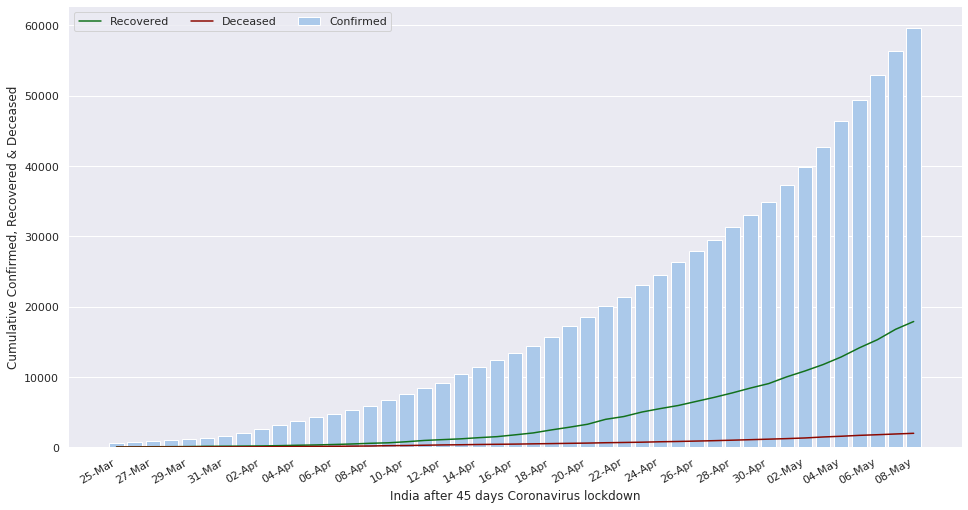

In [267]:
# Initialize the matplotlib figure
fig, axs = plt.subplots(figsize=(16, 9))

sns.set_color_codes("pastel")
sns.barplot(x=df.date, y=df.totalconfirmed, color='b', label='Confirmed')
sns.set_color_codes("dark")
sns.lineplot(x=df.date, y=df.totalrecovered, color='g', label='Recovered')
sns.lineplot(x=df.date, y=df.totaldeceased, color='r', label='Deceased')

# set the frequency for labelling the xaxis
freq = int(2)

# set the xlabels as the datetime data for the given labelling frequency,
# also use only the date for the label

dt = df.iloc[::freq].date
dt = pd.to_datetime(dt).dt.strftime('%d-%b')
axs.set_xticklabels(dt)

# set the xticks at the same frequency as the xlabels
xtix = axs.get_xticks()
axs.set_xticks(xtix[::freq])

fig.autofmt_xdate()

# Add a legend and informative axis label
axs.legend(ncol=3, frameon=True)
axs.set(ylabel="Cumulative Confirmed, Recovered & Deceased", xlabel= "India after " + str(len(df.index)) + " days Coronavirus lockdown")
sns.despine(left=True, bottom=True)